In [2]:
import os 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import linkage, dendrogram
import geopandas as gpd
import textwrap
from matplotlib.patches import ConnectionPatch
from scipy.spatial import Voronoi

In [3]:
import pandas as pd 
import sys

In [4]:
os.chdir("/Users/treymccray/HERC_Sp25/4_Data_Modeling/4.2_KNN_Clustering")
# Add the directory to sys.path so Python knows where to find the Demographic_Buckets module
sys.path.append("/Users/treymccray/HERC_Sp25/4_Data_Modeling/4.2_KNN_Clustering")
from Demographic_Buckets import student_teacher_ratio
from Demographic_Buckets import student_count
from Demographic_Buckets import staff_count
from Demographic_Buckets import race_ethnicity_percent
from Demographic_Buckets import economically_disadvantaged
from Demographic_Buckets import special_ed_504
from Demographic_Buckets import language_education_percent
from Demographic_Buckets import special_populations_percent
from Demographic_Buckets import gifted_students
from Demographic_Buckets import district_identifiers

In [5]:
from KNN_Model import calculate_missing_percentage
from KNN_Model import drop_columns
from KNN_Model import preprocess_data
from KNN_Model import knn_distance
from KNN_Model import knn_cosine
from KNN_Model import knn_canberra
from KNN_Model import find_nearest_districts
from KNN_Model import get_neighbor_data

In [6]:

from KNN_Diagnostic_Plots import plot_texas_districts
from KNN_Diagnostic_Plots import plot_race_ethnicity_stacked_bar
from KNN_Diagnostic_Plots import plot_class_size_k6_bar
from KNN_Diagnostic_Plots import plot_special_ed_504_bar

In [7]:
import os
import pandas as pd

# Change the directory to the desired folder
os.chdir("/Users/treymccray/HERC_Sp25/4_Data_Modeling/4.2_KNN_Clustering")

# Read the CSV files
df = pd.read_csv("/Users/treymccray/HERC_Sp25/0_Datasets/1.7Master_Files/Individual Year Files_Take2/merged_2023.csv")
distgrad = pd.read_csv("/Users/treymccray/HERC_Sp25/0_Datasets/1.6Data2023/District/clean_data/distgrad_2023_clean.csv")
distprof = pd.read_csv("/Users/treymccray/HERC_Sp25/0_Datasets/1.6Data2023/District/clean_data/distprof_2023_clean.csv")
df = df[df['Charter School (Y/N)'] == 'N']
demographic_df = df[student_teacher_ratio + student_count + staff_count + race_ethnicity_percent + economically_disadvantaged +
                    special_ed_504 + language_education_percent + special_populations_percent + gifted_students +
                    district_identifiers]
numeric_cols = df.select_dtypes(include='number').columns

# Replace negative values with NaN only in numeric columns
df[numeric_cols] = df[numeric_cols].mask(df[numeric_cols] < 0, np.nan)


#plt.hist(calculate_missing_percentage(demographic_df) / 100)
#plt.title("Histogram of percentage of NA values in columns within demographic attributes")
#demographic_df

In [22]:
dropout_rates = ['District 2022 Annual Dropout for Grades 09-12: All Students Rate',
 'District 2022 Annual Dropout for Grades 09-12: Male Rate', 'District 2022 Annual Dropout for Grades 09-12: Female Rate',
  'District 2022 Annual Dropout for Grades 09-12: Asian Rate', 'District 2022 Annual Dropout for Grades 09-12: African American Rate', 
  'District 2022 Annual Dropout for Grades 09-12: Hispanic Rate', 'District 2022 Annual Dropout for Grades 09-12: American Indian Rate', 
  'District 2022 Annual Dropout for Grades 09-12: Pacific Islander Rate', 'District 2022 Annual Dropout for Grades 09-12: Two or More Races Rate',
   'District 2022 Annual Dropout for Grades 09-12: White Rate', 'District 2022 Annual Dropout for Grades 09-12: Econ Disadv Rate',
    'District 2022 Annual Dropout for Grades 09-12: Special Ed Rate', 'District 2022 Annual Dropout for Grades 09-12: At Risk Rate', 
    'District 2022 Annual Dropout for Grades 09-12: EB/EL Rate', 'District 2021 Annual Dropout for Grades 09-12: All Students Rate',
     'District 2021 Annual Dropout for Grades 09-12: Male Rate', 'District 2021 Annual Dropout for Grades 09-12: Female Rate',
      'District 2021 Annual Dropout for Grades 09-12: Asian Rate', 'District 2021 Annual Dropout for Grades 09-12: African American Rate', 
      'District 2021 Annual Dropout for Grades 09-12: Hispanic Rate', 'District 2021 Annual Dropout for Grades 09-12: American Indian Rate', 
      'District 2021 Annual Dropout for Grades 09-12: Pacific Islander Rate', 'District 2021 Annual Dropout for Grades 09-12: Two or More Races Rate', 
      'District 2021 Annual Dropout for Grades 09-12: White Rate', 'District 2021 Annual Dropout for Grades 09-12: Econ Disadv Rate',
       'District 2021 Annual Dropout for Grades 09-12: Special Ed Rate',
 'District 2021 Annual Dropout for Grades 09-12: At Risk Rate', 'District 2021 Annual Dropout for Grades 09-12: EL Rate']


In [9]:
import re  # Import regex module

# Dictionary of datasets
datasets = {
    "df": df,
    "distgrad": distgrad,
    "distprof": distprof
}

# Loop through each dataset and find matching columns
for dataset_name, dataset in datasets.items():
    matching_columns = [col for col in dataset.columns if re.search(r"Annual Dropout.*09-12.*Rate", col, re.IGNORECASE)]
    
    print(f"Dataset: {dataset_name}")
    print("  Columns containing 'Annual Dropout', '09-12', and 'Rate':", matching_columns)
    print("-" * 50)  # Separator for readability


Dataset: df
  Columns containing 'Annual Dropout', '09-12', and 'Rate': ['District 2022 Annual Dropout for Grades 09-12: All Students Rate', 'District 2022 Annual Dropout for Grades 09-12: Male Rate', 'District 2022 Annual Dropout for Grades 09-12: Female Rate', 'District 2022 Annual Dropout for Grades 09-12: Asian Rate', 'District 2022 Annual Dropout for Grades 09-12: African American Rate', 'District 2022 Annual Dropout for Grades 09-12: Hispanic Rate', 'District 2022 Annual Dropout for Grades 09-12: American Indian Rate', 'District 2022 Annual Dropout for Grades 09-12: Pacific Islander Rate', 'District 2022 Annual Dropout for Grades 09-12: Two or More Races Rate', 'District 2022 Annual Dropout for Grades 09-12: White Rate', 'District 2022 Annual Dropout for Grades 09-12: Econ Disadv Rate', 'District 2022 Annual Dropout for Grades 09-12: Special Ed Rate', 'District 2022 Annual Dropout for Grades 09-12: At Risk Rate', 'District 2022 Annual Dropout for Grades 09-12: EB/EL Rate', 'Distr

In [ ]:
import matplotlib.pyplot as plt
import textwrap

def plot_dropout_rates(neighbors, df, year):
    """
    Visualizes dropout rates for the year 2022 as percentages using side-by-side bar charts.

    Parameters:
    - neighbors (pd.DataFrame): DataFrame containing DISTRICT_ID and DISTNAME of neighboring districts.
    - df (pd.DataFrame): DataFrame containing district dropout rate data.

    Returns:
    - A side-by-side bar chart comparing dropout rate distributions for 2022.
    """
    district_ids = list(neighbors['DISTRICT_id'])

    # Step 0: Locate the Inputed District
    input_dist = df[df["DISTRICT_id"] == district_ids[0]]['DISTNAME'].iloc[0]
    print(input_dist)
    
    # Step 1: Filter dropout rate columns for 2022
    dropout_rates_filt = [col for col in dropout_rates if year in col]

    # Step 2: Filter the DataFrame to include only selected districts and 2022 dropout rate columns
    selected_districts = df[df['DISTRICT_id'].isin(district_ids)][['DISTNAME'] + dropout_rates_filt]

    # Step 3: Check if any districts were found
    if selected_districts.empty:
        print("No matching districts found. Check the district IDs.")
        return

    # Step 4: Set the district names as index for plotting
    selected_districts.set_index("DISTNAME", inplace=True)

    # Step 5: Determine max dropout rate dynamically
    max_value = selected_districts[dropout_rates_filt].max().max()  # Max across all categories and districts
    buffer = max_value * 0.1  # Add 10% buffer for readability

    # Step 6: Assign more diverse colors (tab20 colormap for more variety)
    num_categories = len(dropout_rates_filt)
    color_map = plt.cm.get_cmap("tab20", num_categories)  # Use "tab20" for more diverse colors
    colors = [color_map(i) for i in range(num_categories)]

    # Step 7: Plot the side-by-side bar chart
    ax = selected_districts[dropout_rates_filt].plot(
        kind='bar', 
        figsize=(14, 8), 
        width=0.8, 
        color=colors  # Apply diverse colors
    )

    # Step 8: Formatting
    plt.title(f"Annual Dropout Rate Distribution for Grades 09-12 in {year} for Districts Similar to {input_dist}", fontsize=14)
    plt.xlabel("School Districts", fontsize=12)
    plt.ylabel("Dropout Rate (%)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, min(100, max_value + buffer))  # Scale dynamically but cap at 100%

    # Rename legend labels for clarity
    formatted_legend_labels = [label.replace(f"District {year} Annual Dropout for Grades 09-12: ", "") for label in  dropout_rates_filt]
    wrapped_labels = [textwrap.fill(label, width=15) for label in formatted_legend_labels]

    # Move legend to the right and wrap text for better readability
    ax.legend(wrapped_labels, title="Dropout Rates (%)", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10, title_fontsize=12)

    # Improve layout
    plt.tight_layout()
    plt.show()


In [12]:
def plot_economically_disadvantaged_side_by_side(neighbors, df):
    """
    Visualizes economically disadvantaged distribution as percentages using side-by-side bar charts.

    Parameters:
    - neighbors (df): DF of neighbors DISTRICT_ID and DISTNAME
    - df (pd.DataFrame): DataFrame containing district economically disadvantaged data.

    Returns:
    - A side-by-side bar chart comparing economically disadvantaged distributions.
    """
    district_ids = list(neighbors['DISTRICT_id'])
    # Step0: Locate the Inputed District
    input_dist = df[df["DISTRICT_id"] == district_ids[0]]['DISTNAME'].iloc[0]
    print((input_dist))
    
    # Step 1: Filter the DataFrame to include only selected districts
    selected_districts = df[df['DISTRICT_id'].isin(district_ids)][['DISTRICT_id', 'DISTNAME'] + economically_disadvantaged]

    # Step 2: Check if any districts were found
    if selected_districts.empty:
        print("No matching districts found. Check the district IDs.")
        return

    # Step 3: Calculate total student count per district
    selected_districts["Total Students"] = selected_districts[economically_disadvantaged].sum(axis=1)

    # Step 4: Convert economically disadvantaged counts to percentages
    for col in economically_disadvantaged:
        selected_districts[col] = (selected_districts[col] / selected_districts["Total Students"]) * 100

    # Step 5: Set the district names as index for plotting
    selected_districts.set_index("DISTNAME", inplace=True)

    # Step 6: Plot the side-by-side bar chart
    ax = selected_districts[economically_disadvantaged].plot(
        kind='bar', 
        figsize=(12, 7), 
        width=0.8, 
        position=1,  # This parameter makes bars display side-by-side
        colormap="tab10"
    )

    # Step 7: Formatting
    plt.title(f"Economically Disadvantaged Percentage Distribution for Schools Similar to {input_dist}", fontsize=14)
    plt.xlabel("School Districts", fontsize=12)
    plt.ylabel("Percentage (%)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 100)  # Ensure the y-axis represents 0% to 100%

    # Rename legend labels to reflect percentages instead of counts
    formatted_legend_labels = [
        label.replace("District 2022-23", "") for label in economically_disadvantaged
    ]
    # Format legend with wrapped text to prevent it from being too large
    wrapped_labels = [textwrap.fill(label, width=15) for label in formatted_legend_labels]
    
    # Move legend to the right and wrap text for better readability
    ax.legend(wrapped_labels, title= f"Economically Disadvantaged (Percentage)", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10, title_fontsize=12)

    # Improve layout
    plt.tight_layout()
    plt.show()


Distance Metric: euclidean
      DISTRICT_id       DISTNAME
532        101912    HOUSTON ISD
524        101902     ALDINE ISD
1093       227907      MANOR ISD
541        101924    SHELDON ISD
1137       237902  HEMPSTEAD ISD
HOUSTON ISD


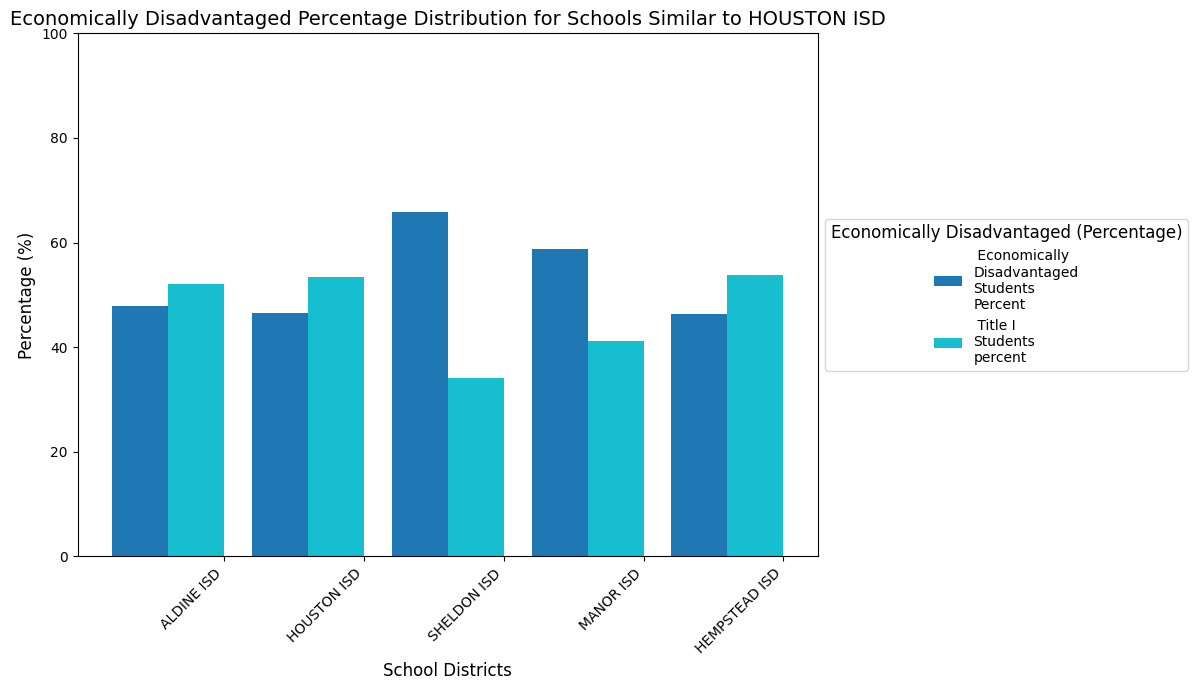

Distance Metric: manhattan
      DISTRICT_id       DISTNAME
532        101912    HOUSTON ISD
524        101902     ALDINE ISD
1137       237902  HEMPSTEAD ISD
1093       227907      MANOR ISD
541        101924    SHELDON ISD
HOUSTON ISD


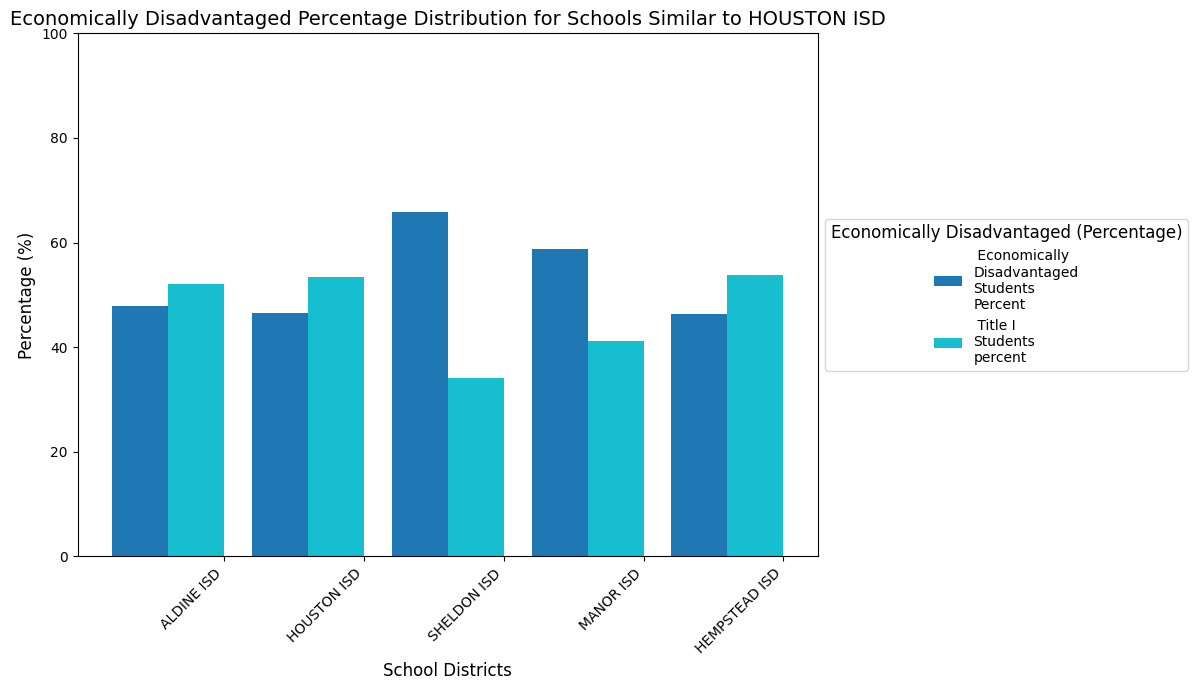

Distance Metric: mahalanobis
      DISTRICT_id        DISTNAME
532        101912     HOUSTON ISD
541        101924     SHELDON ISD
1137       237902   HEMPSTEAD ISD
1037       220901   ARLINGTON ISD
1040       220905  FORT WORTH ISD
HOUSTON ISD


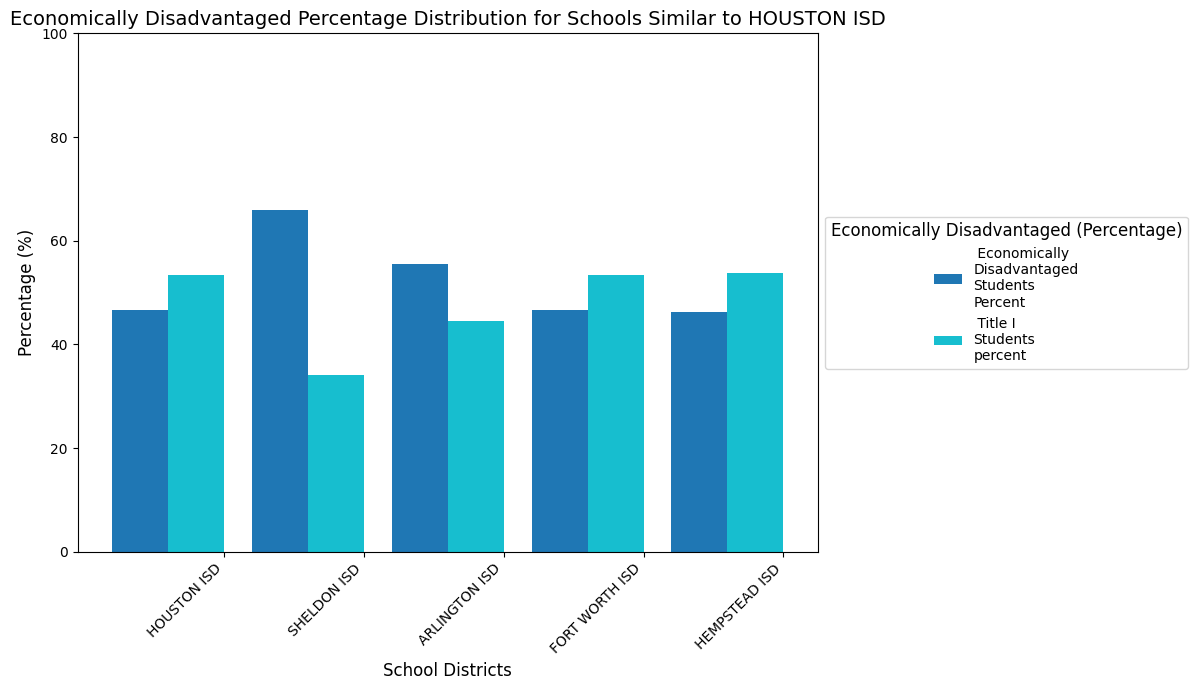

Distance Metric: cosine
      DISTRICT_id        DISTNAME
532        101912     HOUSTON ISD
1093       227907       MANOR ISD
1137       237902   HEMPSTEAD ISD
1040       220905  FORT WORTH ISD
1151       241904     WHARTON ISD
HOUSTON ISD


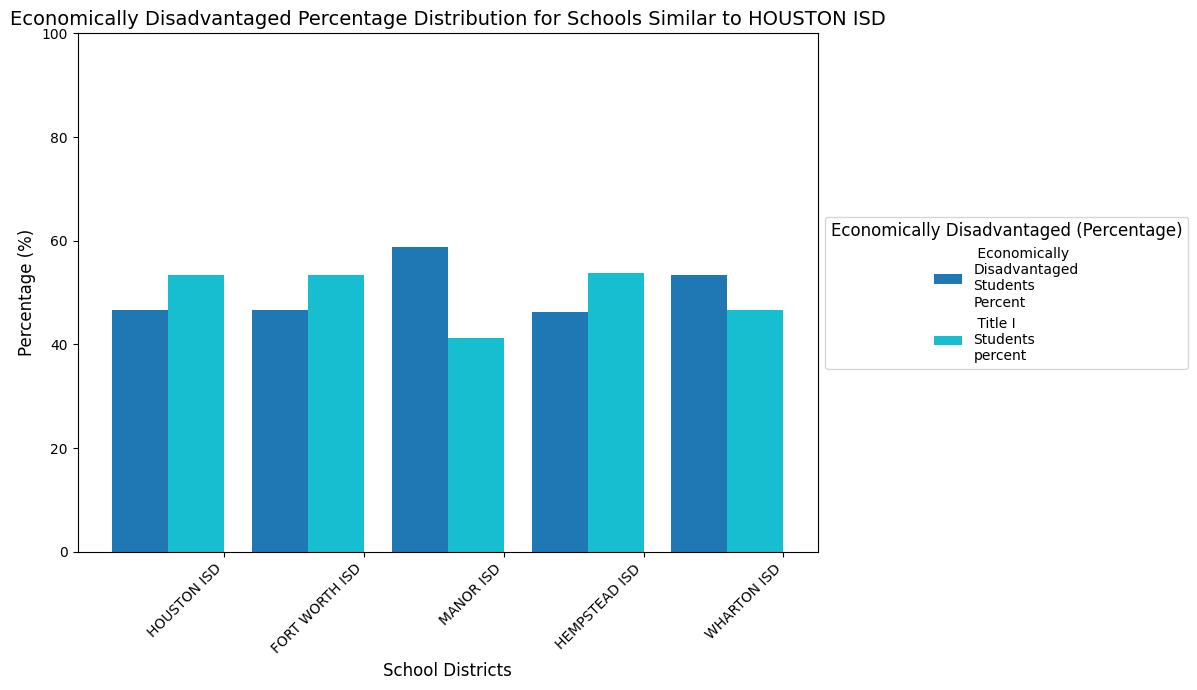

Distance Metric: canberra
      DISTRICT_id           DISTNAME
532        101912        HOUSTON ISD
1040       220905     FORT WORTH ISD
289         57910  GRAND PRAIRIE ISD
1093       227907          MANOR ISD
1139       237905          ROYAL ISD
HOUSTON ISD


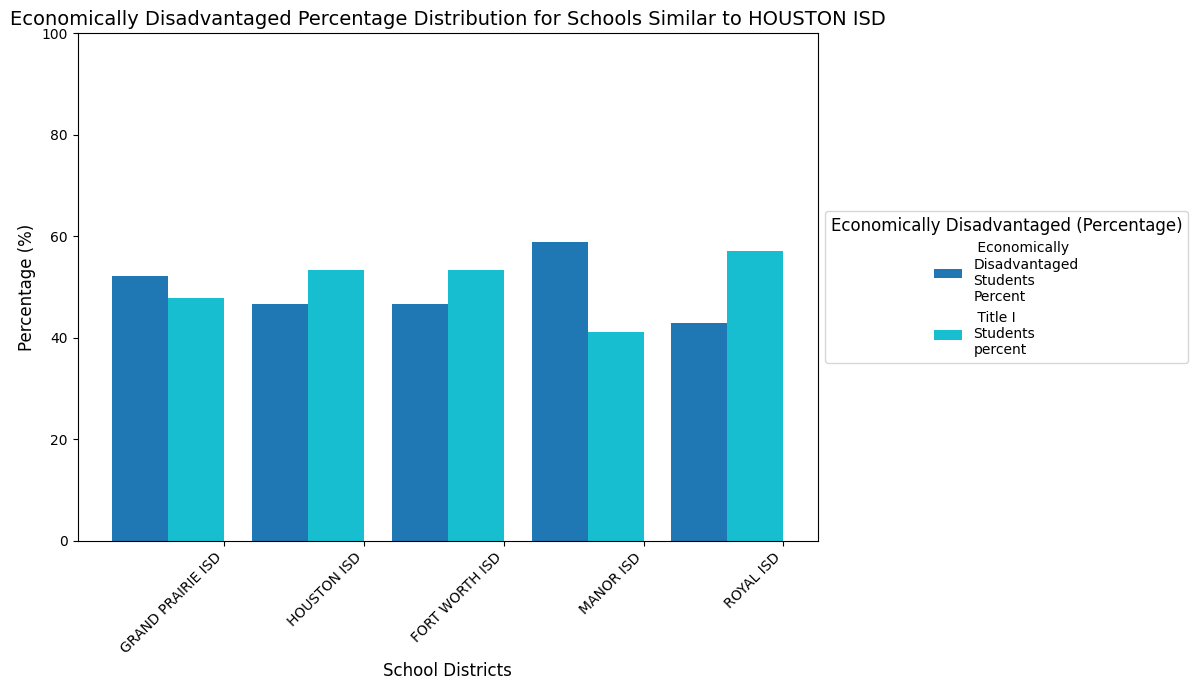

In [13]:
distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra']
selected_features = race_ethnicity_percent +  student_teacher_ratio + special_ed_504

for distance_metric in distance_metrics: 
    print(f"Distance Metric: {distance_metric}")
    knn_model = find_nearest_districts(df, 101912, selected_features, 5, distance_metric, "median")
    print(knn_model)
    plot_economically_disadvantaged_side_by_side(knn_model, df)
    

Distance Metric: euclidean
      DISTRICT_id       DISTNAME
532        101912    HOUSTON ISD
524        101902     ALDINE ISD
1093       227907      MANOR ISD
541        101924    SHELDON ISD
1137       237902  HEMPSTEAD ISD
HOUSTON ISD


/var/folders/01/0sqp6m4d0h19h3gd9446z47r0000gn/T/ipykernel_1253/1330786534.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab20", num_categories)  # Use "tab20" for more diverse colors


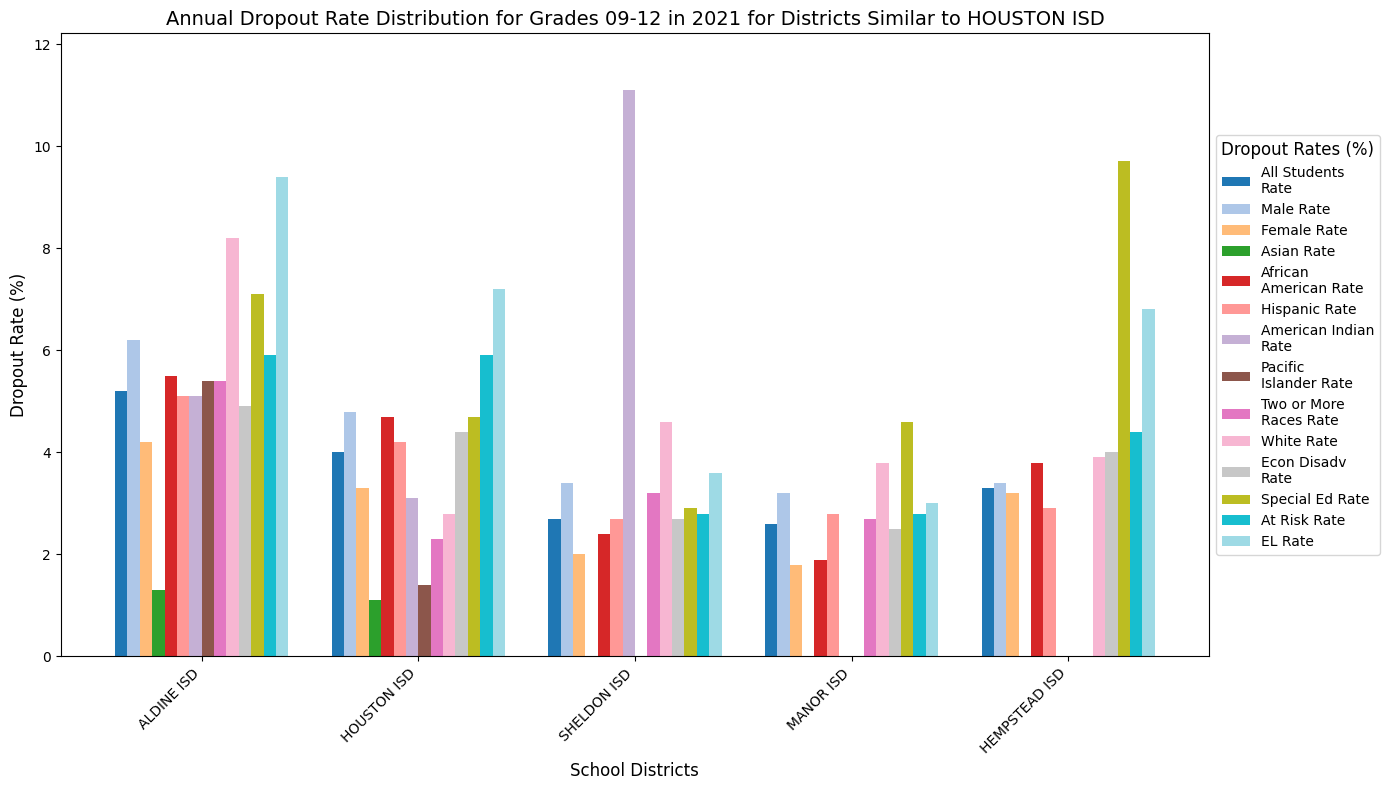

Distance Metric: manhattan
      DISTRICT_id       DISTNAME
532        101912    HOUSTON ISD
524        101902     ALDINE ISD
1137       237902  HEMPSTEAD ISD
1093       227907      MANOR ISD
541        101924    SHELDON ISD
HOUSTON ISD


/var/folders/01/0sqp6m4d0h19h3gd9446z47r0000gn/T/ipykernel_1253/1330786534.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab20", num_categories)  # Use "tab20" for more diverse colors


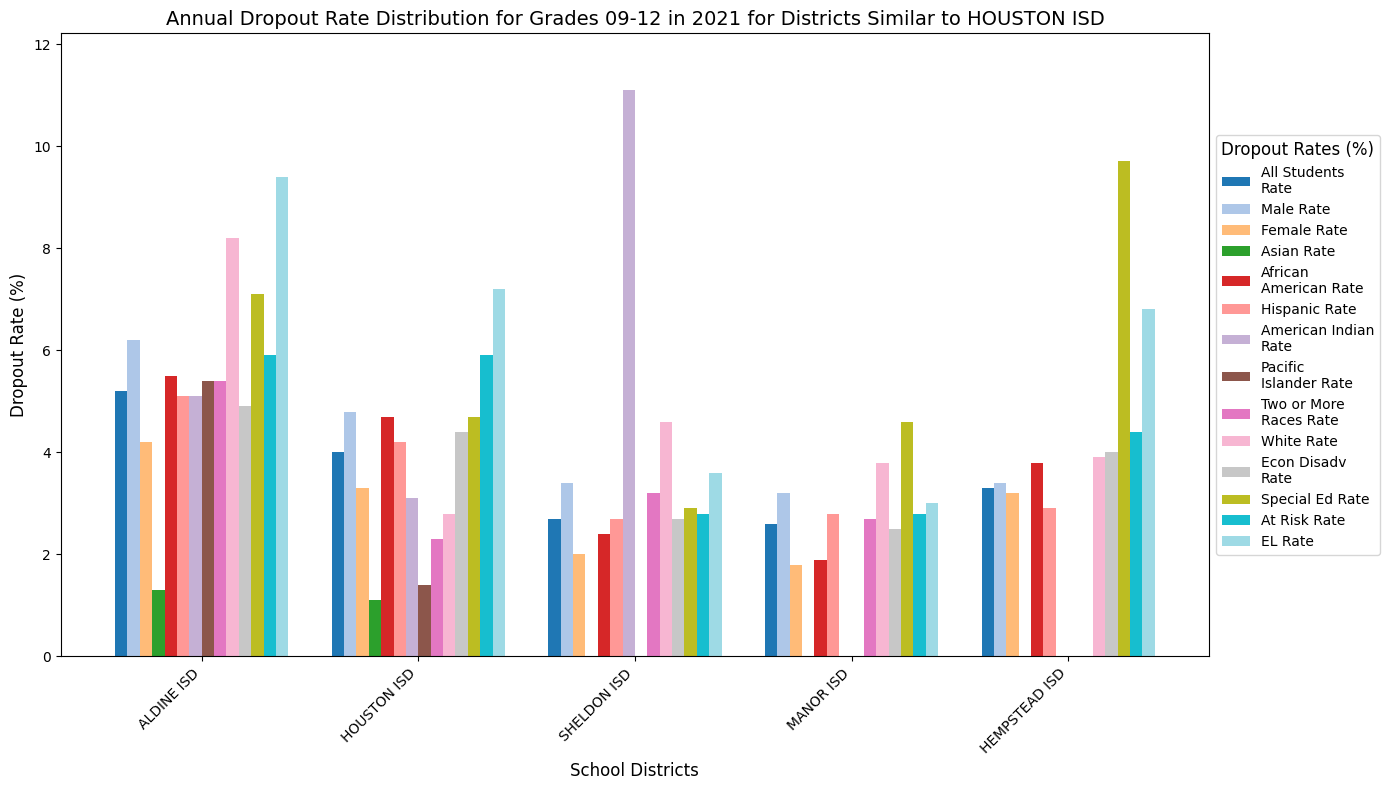

Distance Metric: mahalanobis
      DISTRICT_id        DISTNAME
532        101912     HOUSTON ISD
541        101924     SHELDON ISD
1137       237902   HEMPSTEAD ISD
1037       220901   ARLINGTON ISD
1040       220905  FORT WORTH ISD
HOUSTON ISD


/var/folders/01/0sqp6m4d0h19h3gd9446z47r0000gn/T/ipykernel_1253/1330786534.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab20", num_categories)  # Use "tab20" for more diverse colors


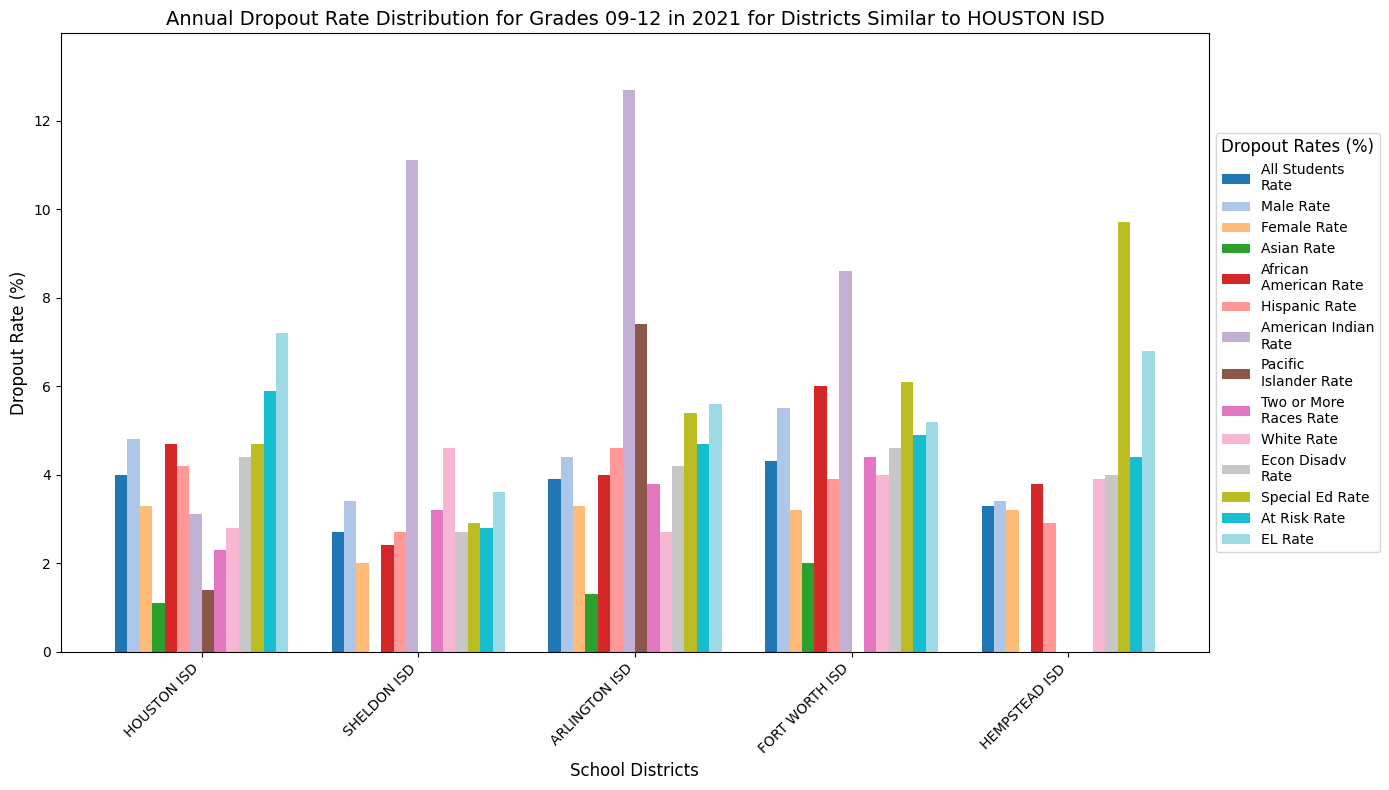

Distance Metric: cosine
      DISTRICT_id        DISTNAME
532        101912     HOUSTON ISD
1093       227907       MANOR ISD
1137       237902   HEMPSTEAD ISD
1040       220905  FORT WORTH ISD
1151       241904     WHARTON ISD
HOUSTON ISD


/var/folders/01/0sqp6m4d0h19h3gd9446z47r0000gn/T/ipykernel_1253/1330786534.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab20", num_categories)  # Use "tab20" for more diverse colors


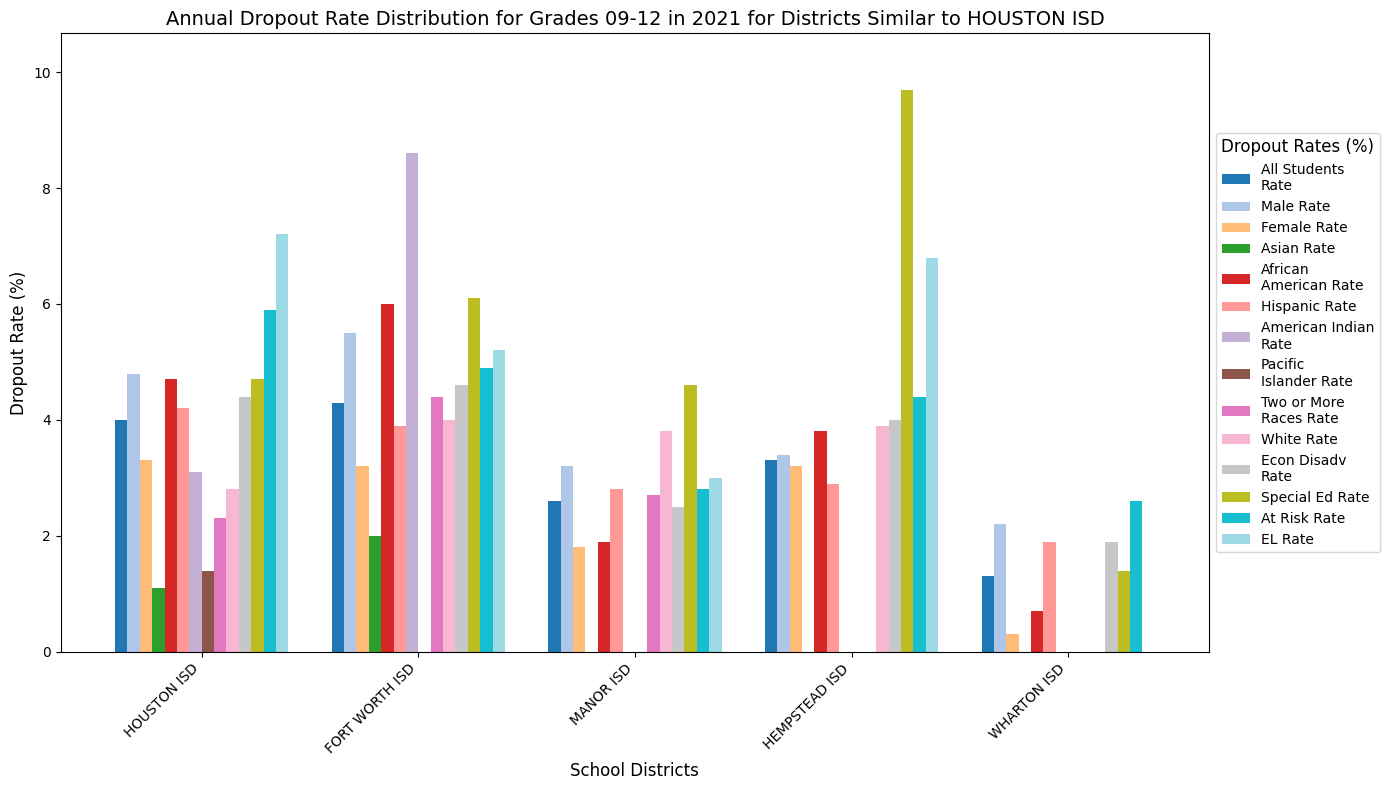

Distance Metric: canberra
      DISTRICT_id           DISTNAME
532        101912        HOUSTON ISD
1040       220905     FORT WORTH ISD
289         57910  GRAND PRAIRIE ISD
1093       227907          MANOR ISD
1139       237905          ROYAL ISD
HOUSTON ISD


/var/folders/01/0sqp6m4d0h19h3gd9446z47r0000gn/T/ipykernel_1253/1330786534.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab20", num_categories)  # Use "tab20" for more diverse colors


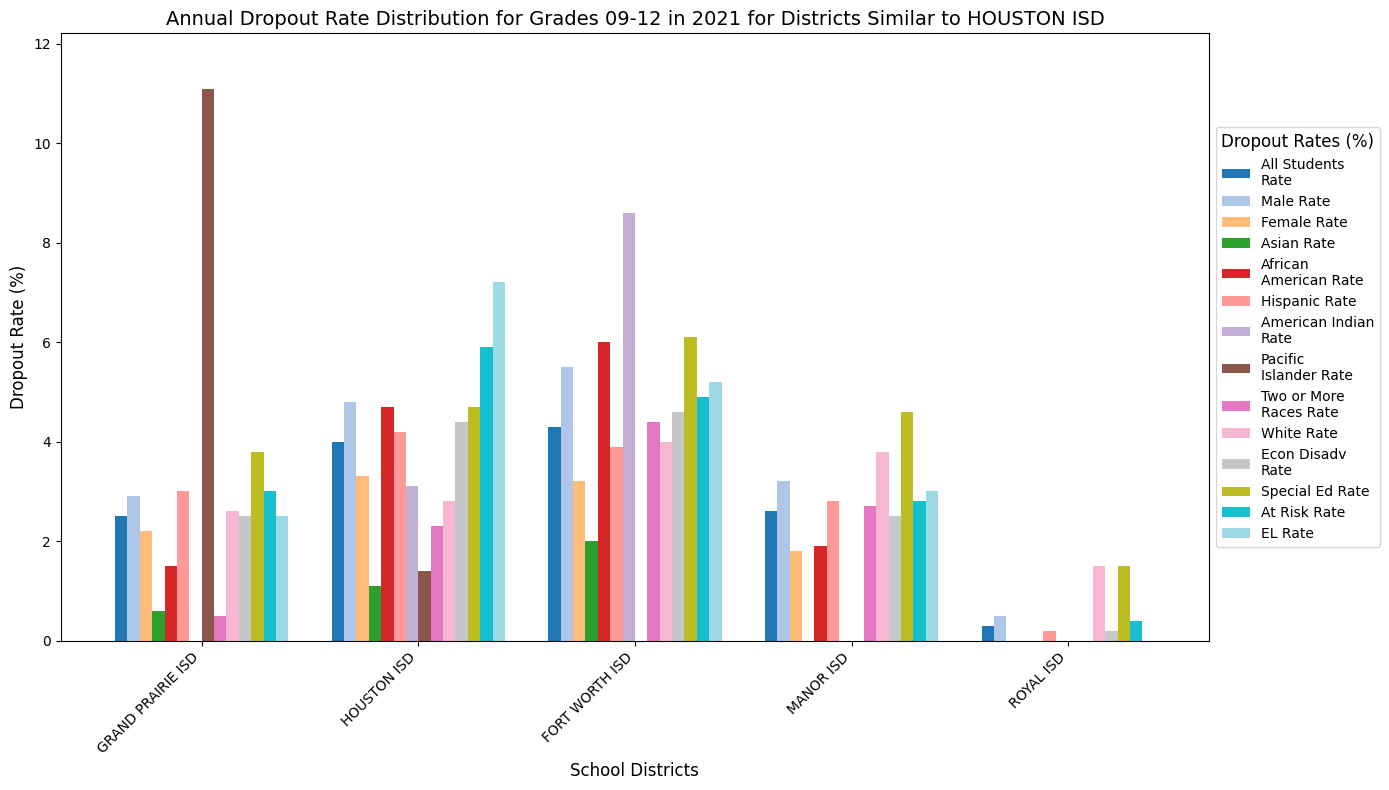

In [38]:
distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra']
selected_features = race_ethnicity_percent +  student_teacher_ratio + special_ed_504

for distance_metric in distance_metrics: 
    print(f"Distance Metric: {distance_metric}")
    knn_model = find_nearest_districts(df, 101912, selected_features, 5, distance_metric, "median")
    print(knn_model)
    plot_dropout_rates_2022_side_by_side(knn_model, df, "2021")

In [34]:
possible_features = [
    'student_teacher_ratio',
    'student_count',
    'staff_count',
    'race_ethnicity_percent',
    'economically_disadvantaged',
    'special_ed_504',
    'language_education_percent',
    'special_populations_percent',
    'gifted_students',
    'district_identifiers'
]

distance_metrics = [
    'euclidean',
    'manhattan',
    'mahalanobis',
    'cosine',
    'canberra']

nearest_neighbors = find_nearest_districts(df, 101912, student_teacher_ratio, 5, "Euclidean", "median") 
neighbors_df = get_neighbor_data(df, student_teacher_ratio, nearest_neighbors)
neighbors_df[neighbors_df.columns.difference(district_identifiers)]


#for distance_metric in distance_metrics: 
#    #print(f"Distance Metric: {distance_metric}")
#    knn_model = find_nearest_districts(df, 101912, selected_features, 5, distance_metric, "median")
#    test = get_neighbor_data(df, selected_features, knn_model)
#    print(test)
#    #plot_texas_districts(knn_model, df)
    #plot_race_ethnicity_stacked_bar(knn_model, df)
    #plot_special_ed_504_bar(knn_model, df)


,DISTNAME_x,DISTNAME_y,District 2023 Staff: Teacher Student Ratio
0,ELGIN ISD,ELGIN ISD,17.6
1,LAMAR CISD,LAMAR CISD,17.8
2,HOUSTON ISD,HOUSTON ISD,18.0
3,EAGLE PASS ISD,EAGLE PASS ISD,17.4
4,WILLIS ISD,WILLIS ISD,17.9
